# ノート

In [1]:
MARKET = "ZEC"
FREQ = '5m'
DAYS = 14

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.tseries.offsets as offsets
import gc
import seaborn
from datetime import datetime, timedelta, date
import time
import mplfinance as mpf

In [3]:
from hyperliquid.info import Info

In [4]:
from hyperliquid.utils import constants


info = Info(base_url=constants.MAINNET_API_URL, skip_ws=True)

# Get current timestamp from epoch in milliseconds
current_timestamp = int(datetime.now().timestamp() * 1000)

# 24 hours ago

# Get the user state and print out position information
df = pd.DataFrame()

# Loop through the candles and convert the timestamps to datetime objects
step_days = 1
start_timestamp = current_timestamp - 24 * 60 * 60 * 1000 * step_days

for i in range(DAYS):
    print("%d day ago to %d day ago..." % ((i+1)*step_days, i*step_days))

    candles = info.candles_snapshot(MARKET, FREQ, start_timestamp, current_timestamp)
    time.sleep(0.5)
    df_tmp = pd.DataFrame(candles)
    df = pd.concat([df_tmp, df])
    current_timestamp = start_timestamp -1 
    start_timestamp = current_timestamp - 24 * 60 * 60 * 1000 * step_days

# Rename columns
df = df.rename(columns={'t': "open-time", 'T': "close-time", "s": "market", "i": "frequency", "o": "open", "h": "high", "l": "low", "c": "close", "v": "volume", "n": "count"})
df = df.astype({'open-time': np.int64, 'open':np.float32, 'high':np.float32, 'low':np.float32, 'close':np.float32})
df['open-time'] =  pd.to_datetime(df['open-time'], utc=True, unit='ms')
df['close-time'] =  pd.to_datetime(df['close-time'], utc=True, unit='ms')

df.set_index('open-time', inplace=True)


1 day ago to 0 day ago...
2 day ago to 1 day ago...
3 day ago to 2 day ago...
4 day ago to 3 day ago...
5 day ago to 4 day ago...
6 day ago to 5 day ago...
7 day ago to 6 day ago...
8 day ago to 7 day ago...
9 day ago to 8 day ago...
10 day ago to 9 day ago...
11 day ago to 10 day ago...
12 day ago to 11 day ago...
13 day ago to 12 day ago...
14 day ago to 13 day ago...


In [5]:
df

,close-time,market,frequency,open,close,high,low,volume,count
open-time,,,,,,,,,
2025-10-22 17:30:00+00:00,2025-10-22 17:34:59.999000+00:00,ZEC,5m,256.839996,259.769989,259.959991,256.470001,1831.87,329
2025-10-22 17:35:00+00:00,2025-10-22 17:39:59.999000+00:00,ZEC,5m,259.739990,257.540009,260.829987,257.369995,524.37,284
2025-10-22 17:40:00+00:00,2025-10-22 17:44:59.999000+00:00,ZEC,5m,257.540009,255.660004,257.649994,255.279999,1192.44,212
2025-10-22 17:45:00+00:00,2025-10-22 17:49:59.999000+00:00,ZEC,5m,255.600006,251.630005,255.600006,249.809998,4720.2,1091
2025-10-22 17:50:00+00:00,2025-10-22 17:54:59.999000+00:00,ZEC,5m,251.800003,247.179993,251.800003,247.179993,2493.82,594
...,...,...,...,...,...,...,...,...,...
2025-11-05 17:10:00+00:00,2025-11-05 17:14:59.999000+00:00,ZEC,5m,475.820007,472.510010,476.049988,470.339996,3095.96,1030
2025-11-05 17:15:00+00:00,2025-11-05 17:19:59.999000+00:00,ZEC,5m,472.429993,475.959991,476.380005,471.690002,1484.94,605
2025-11-05 17:20:00+00:00,2025-11-05 17:24:59.999000+00:00,ZEC,5m,475.649994,476.170013,477.630005,474.589996,1951.86,516


<Axes: xlabel='open-time'>

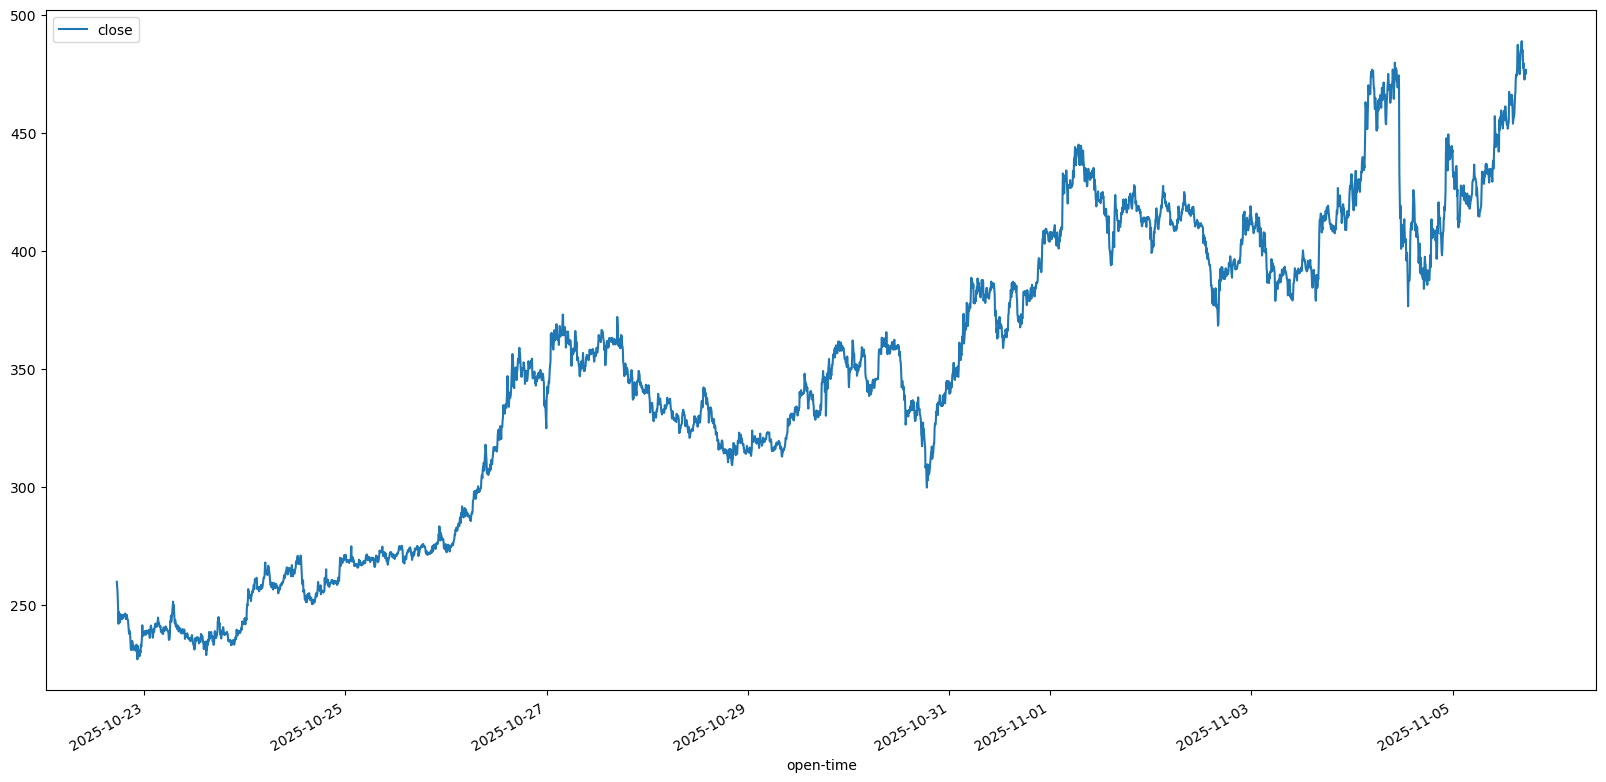

In [6]:
df.plot(y='close', figsize=(20, 10))

In [7]:
df

,close-time,market,frequency,open,close,high,low,volume,count
open-time,,,,,,,,,
2025-10-22 17:30:00+00:00,2025-10-22 17:34:59.999000+00:00,ZEC,5m,256.839996,259.769989,259.959991,256.470001,1831.87,329
2025-10-22 17:35:00+00:00,2025-10-22 17:39:59.999000+00:00,ZEC,5m,259.739990,257.540009,260.829987,257.369995,524.37,284
2025-10-22 17:40:00+00:00,2025-10-22 17:44:59.999000+00:00,ZEC,5m,257.540009,255.660004,257.649994,255.279999,1192.44,212
2025-10-22 17:45:00+00:00,2025-10-22 17:49:59.999000+00:00,ZEC,5m,255.600006,251.630005,255.600006,249.809998,4720.2,1091
2025-10-22 17:50:00+00:00,2025-10-22 17:54:59.999000+00:00,ZEC,5m,251.800003,247.179993,251.800003,247.179993,2493.82,594
...,...,...,...,...,...,...,...,...,...
2025-11-05 17:10:00+00:00,2025-11-05 17:14:59.999000+00:00,ZEC,5m,475.820007,472.510010,476.049988,470.339996,3095.96,1030
2025-11-05 17:15:00+00:00,2025-11-05 17:19:59.999000+00:00,ZEC,5m,472.429993,475.959991,476.380005,471.690002,1484.94,605
2025-11-05 17:20:00+00:00,2025-11-05 17:24:59.999000+00:00,ZEC,5m,475.649994,476.170013,477.630005,474.589996,1951.86,516


In [8]:
# メモリ使用量をよく確認すること（分足くらいなら基本的に大したことはない）
# データ型に特に注意
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4046 entries, 2025-10-22 17:30:00+00:00 to 2025-11-05 17:30:00+00:00
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   close-time  4046 non-null   datetime64[ns, UTC]
 1   market      4046 non-null   object             
 2   frequency   4046 non-null   object             
 3   open        4046 non-null   float32            
 4   close       4046 non-null   float32            
 5   high        4046 non-null   float32            
 6   low         4046 non-null   float32            
 7   volume      4046 non-null   object             
 8   count       4046 non-null   int64              
dtypes: datetime64[ns, UTC](1), float32(4), int64(1), object(3)
memory usage: 878.5 KB


In [9]:
# Make sure all index is unique
df[df.index.duplicated()]

,close-time,market,frequency,open,close,high,low,volume,count
open-time,,,,,,,,,
2025-10-23 17:30:00+00:00,2025-10-23 17:34:59.999000+00:00,ZEC,5m,237.860001,238.869995,238.990005,237.660004,69.25,48
2025-10-24 17:30:00+00:00,2025-10-24 17:34:59.999000+00:00,ZEC,5m,257.989990,259.679993,259.769989,257.480011,3375.6,441
2025-10-25 17:30:00+00:00,2025-10-25 17:34:59.999000+00:00,ZEC,5m,270.609985,271.609985,272.230011,270.299988,1272.45,595
2025-10-26 17:30:00+00:00,2025-10-26 17:34:59.999000+00:00,ZEC,5m,357.619995,358.880005,358.880005,354.399994,2803.69,770
2025-10-27 17:30:00+00:00,2025-10-27 17:34:59.999000+00:00,ZEC,5m,358.760010,360.329987,360.380005,357.809998,486.79,241
2025-10-28 17:30:00+00:00,2025-10-28 17:34:59.999000+00:00,ZEC,5m,317.519989,316.130005,319.279999,313.799988,6573.99,893
2025-10-29 17:30:00+00:00,2025-10-29 17:34:59.999000+00:00,ZEC,5m,332.619995,335.130005,335.470001,332.619995,274.09,154
2025-10-30 17:30:00+00:00,2025-10-30 17:34:59.999000+00:00,ZEC,5m,321.059998,317.200012,321.609985,317.200012,2154.54,703
2025-10-31 17:30:00+00:00,2025-10-31 17:34:59.999000+00:00,ZEC,5m,371.059998,371.809998,373.399994,370.630005,464.12,193


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df[df.index.duplicated()]

,close-time,market,frequency,open,close,high,low,volume,count
open-time,,,,,,,,,


In [12]:
df.to_pickle('%s_%s-%s.pkl' % (MARKET, FREQ, date.today().isoformat()))

# 設定

In [13]:
# 直近2日間
TRADE_SINCE = (date.today() - timedelta(days=DAYS)).strftime('%Y%m%d')

# 
TRADE_UNTIL = (date.today() + timedelta(days=1)).strftime('%Y%m%d')

TRADE_SINCE, TRADE_UNTIL


('20251022', '20251106')

### データ削減
データが多い場合は解析が早くなる

In [14]:
df = df[TRADE_SINCE:TRADE_UNTIL].copy()

# 売り買いのシグナルを作成

In [15]:
# クローズをエントリポイントから作る場合
def cretate_buys(rolling_size_buy, dip_buy):
    global df
    # open-time以降は未来の情報なので、close='left'にして、現在の'open-time'以降のデータを集計に含めないようにしないといけない。
    df['rolled-high'] = df['high'].rolling(rolling_size_buy, closed='left').quantile(QUANTILE_HIGH, interpolation='lower')
    df['rolled-low'] = df['low'].rolling(rolling_size_buy, closed='left').quantile(QUANTILE_LOW)
    # df['rolled-high2'] = df['high'].rolling(rolling_size_buy2, closed='left').quantile(QUANTILE_HIGH, interpolation='lower')
    # df['rolled-low2'] = df['low'].rolling(rolling_size_buy2, closed='left').quantile(QUANTILE_LOW)   

    #df['rolled-sell-volume'] = df['taker-sell-volume'].rolling(rolling_size, closed='left').sum()
    #df['rolled-buy-volume'] = df['taker-buy-volume'].rolling(rolling_size, closed='left').sum()
    
    df['buy'] = df['rolled-high'] * dip_buy
    # df['buy'] = df['buy'].round(5) # VERY IMPORTANT!!!!
    # df['buy2'] = df['rolled-high2'] * dip_buy2
    # OPEN時に指した値が HIGH/LOW にかかったらエントリ（かなりナイーブな処理）
    #
    # 元から無効な指値になることがあるので、そもそも指値がOpen価格より上か下か確認すること
    indexer_entry_b = (
        (df['low'] <= df['buy']) &
        (df['open'] > df['buy'])
    )
    
    # 高速化のため売りのポイントのみのデータを作る
    buys = df['buy'][indexer_entry_b]
    return buys

# 損益計算
ロングポジションでしかエントリーしないとする。

#### コードについて
セルをまたぐ参照なので、globalをつける必要がある。
新しく変数を追加した際に、globalの宣言を忘れがちなので注意

In [16]:
def open_position(index, price, verbose=False):
    global trade_count
    global win_count
    global position_coin
    global open_price
    global asset
    global entry_fee
    global last_entry_time
    global last_order_size
    global entry_point_s
    global oepn_price_s
    global position_coin_s

    absprice = abs(price)
    entry_point_s.at[index] = price

    last_entry_time = index
    if MODE == "FIXED_LOT":
        order_size = int(LOT / price)
        fee = LOT * FEE_RATE
    else:
        order_size = int(asset / price * LEVERAGE) 
        fee = asset * FEE_RATE * LEVERAGE # TODO: Not very accurate
    
    # Just record fee and count it when position is closed.
    entry_fee = fee
    open_price = price
    open_price_s.at[index] = open_price
    d = df.loc[index]
    if verbose:
        print(
            "%s, %.1f, BUY, Order Size: %d,  Order Price: %.2f, Open: %.2f, High: %.2f, Low: %.2f, Close: %.2f, Recent High:%.2f, Recent Low: %.2f" %
            (
                index,
                asset,
                order_size,
                price,
                d['open'],
                d['high'],
                d['low'],
                d['close'],
                d['rolled-high'],
                d['rolled-low']
            ) 
        )
    last_order_size = order_size
    position_coin += order_size
    position_coin_s.at[index] = position_coin                


In [17]:
def close_position(index, price, verbose=False):
    global trade_count
    global win_count
    global normal_close_count
    global position_coin
    global open_price
    global asset
    global entry_fee
    global last_entry_time
    global last_order_size
    global fee_s
    global pnl_s
    global asset_s
    global position_duration_s
    global open_price_s
    global close_point_s
    global position_coin_s
    global last_close_time

    absprice = abs(price)

    order_size = -position_coin
    fee =  abs(order_size) * (absprice) * FEE_RATE
    duration_hours  = (index - last_entry_time) / np.timedelta64(1, 'h')
    funding_fee = abs(order_size) * (absprice) * FUNDING_RATE * duration_hours
    fee += funding_fee
    fee += entry_fee
    fee_s.at[index] = fee
    pnl = abs(order_size) * (absprice - open_price) - fee
    pnl_s.at[index] = pnl
    if MODE == "FIXED_LOT":
        pnl_ratio = pnl / LOT
    else:
        pnl_ratio = pnl / asset # Percent change from asset at entry
    pnl_ratio_s.at[index] = pnl_ratio
    asset += pnl
    asset_s.at[index] = asset
    d = df.loc[index]
    trade_count += 1
    win_count += 1 if pnl > 0 else 0
    position_duration_s.at[index] = index - last_entry_time
    if verbose:
        print(
            "%s, %.1f, SELL, Order Size: %d, Order Price: %.2f, Order Open Price: %.2f, PnL: %.1f (%.3f %%), Open: %.2f, High: %.2f, Low: %.2f, Close: %.2f, Recent High:%.2f, Recent Low: %.2f" %
            (
                index,
                asset,
                order_size,
                price,
                open_price,
                pnl,
                pnl_ratio*100,
                d['open'],
                d['high'],
                d['low'],
                d['close'],
                d['rolled-high'],
                d['rolled-low']
            ) 
        )
    close_point_s.at[index] = absprice
    open_price = -1
    open_price_s.at[index] = open_price
    last_order_size = order_size
    position_coin += order_size
    position_coin_s.at[index] = position_coin
    last_close_time = index        


In [18]:
def simulate_pnl(buys, sell_margin, verbose=False):
    global df
    global position_coin
    global position_coin_s
    global open_price
    global open_price_s
    global entry_point_s
    global close_point_s
    global pnl_s
    global pnl_ratio_s
    global asset
    global asset_s
    global fee_s
    global position_duration_s
    global trade_count
    global win_count
    global normal_close_count
    global entry_fee
    global last_entry_time
    global last_order_size
    global last_close_time
    
    # Simulate PnL
    position_coin = 0
    position_coin_s = pd.Series(dtype='float64', name='position_coin')
    position_coin_s.at[df.index[0]] = position_coin

    open_price = -1
    open_price_s = pd.Series(dtype='float64', name='open_price')
    open_price_s.at[df.index[0]] = open_price

    entry_point_s = pd.Series(dtype='float64', name='open_price')
    close_point_s = pd.Series(dtype='float64', name='open_price')

    pnl_s = pd.Series(dtype='float64', name='pnl')
    pnl_s.at[df.index[0]] = 0

    pnl_ratio_s = pd.Series(dtype='float64', name='pnl_percent')
    pnl_ratio_s.at[df.index[0]] = 0

    asset = INITIAL_ASSET
    asset_s = pd.Series(dtype='float64', name='asset')
    asset_s.at[df.index[0]] = asset

    fee_s = pd.Series(dtype='float64', name='fee')
    fee_s.at[df.index[0]] = 0

    position_duration_s = pd.Series(dtype='timedelta64[ns]', name='position-duration')

    trade_count = 0
    win_count = 0
    normal_close_count = 0
    
    entry_fee = 0
    last_entry_time = 0
    last_order_size = 0
    last_close_time = 0

    for index, price in buys.items():
        if index < pd.Timestamp(TRADE_SINCE, tz='utc'):
            continue
        if index > pd.Timestamp(TRADE_UNTIL, tz='utc'):
            continue

        # ロングしかしないようにする。同方向への連続取引回数を制限
        # 単純化のため、複数ロットでのエントリーは行わない。
        if position_coin == 0 and price < 0:
            continue
        if position_coin > 0 and price > 0:
            continue

        if last_close_time == index:
            # 連続して同じ時間にエントリー/クローズしないようにする
            continue

        if last_close_time !=0 and index <= last_close_time:
            continue
        
        if not price > 0:
            raise ValueError("Invalid buy price: %s at %s" % (price, index))

        if position_coin == 0:
            open_position(index, price, verbose=verbose)
            # search until timeout or close happens
            
            # get next index
            iloc = df.index.get_loc(index)
            if iloc >= len(df.index) - 1:
                print("Last index!")
                continue
            i = df.index[iloc + 1]
            while i - last_entry_time <= MAX_POSITION_DURATION:
                if df.loc[i]['high'] > open_price * sell_margin:
                    close_position(i, open_price * sell_margin, verbose=verbose)
                    normal_close_count += 1
                    break
                iloc += 1
                if iloc >= len(df.index) - 1:
                    print("Last index!")
                    break
                i = df.index[iloc + 1]
            if position_coin != 0:
                close_position(i, df.loc[i]['low'], verbose=verbose) # 最も低い価格で閉じたとする


    pnl_percent_s = ((asset_s - INITIAL_ASSET) / INITIAL_ASSET * 100)
    pnl_percent_s.name = 'pnl_percent'
    
    #
    # 各種データを整備
    #
    if 'position_coin' in df:
        df.drop(columns=['position_coin'], inplace=True)
    df = pd.concat([df, position_coin_s], axis=1)
    df['position_coin'] = df['position_coin'].ffill().fillna(0)

    if 'open_price' in df:
        df.drop(columns=['open_price'], inplace=True)
    df = pd.concat([df, open_price_s], axis=1)
    df['open_price'] = df['open_price'].ffill().fillna(-1)

    if 'pnl' in df:
        df.drop(columns=['pnl'], inplace=True)
    df = pd.concat([df, pnl_s], axis=1)
    df['pnl'] = df['pnl'].fillna(0)

    if 'pnl_percent' in df:
        df.drop(columns=['pnl_percent'], inplace=True)
    df = pd.concat([df, pnl_percent_s], axis=1)
    df['pnl_percent'] = df['pnl_percent'].ffill().fillna(1)

    if 'fee' in df:
        df.drop(columns=['fee'], inplace=True)
    df = pd.concat([df, fee_s], axis=1)
    df['fee'] = df['fee'].fillna(0)

    if 'asset' in df:
        df.drop(columns=['asset'], inplace=True)
    df = pd.concat([df, asset_s], axis=1)
    df['asset'] = df['asset'].ffill()

    # ドローダウンを見たいので必ずLOWを使うこと（更に余裕をみて、バッファをつけたほうがいい）
    df['net-asset'] = df['asset'] + df['position_coin'] * (df['low'] - df['open_price'])
    df['net-asset'] = df['net-asset'].ffill()

    # きちんとドローダウンを見たいので必ずLOWを使うこと（
    df['drawdown'] = df['position_coin'] * (df['low'] - df['open_price']) / df['asset']

    # きちんとドローダウンを見たいので必ずLOWを使うこと（更に余裕をみて、バッファをつけたほうがいい）
    if MODE == "FIXED_LOT":
        df['drawdown_percent'] = df['position_coin'] * (df['low'] - df['open_price']) / LOT * 100
    else:
        df['drawdown_percent'] = df['position_coin'] * (df['low'] - df['open_price']) / df['asset'] * 100

    if trade_count == 0:
        return 0, 0, 0, 0, 0, 0
    else:
        try:
            if pnl_ratio_s[1:].std() == 0:
                sharpe_ratio = 0
            else:
                sharpe_ratio = pnl_ratio_s[1:].mean() / pnl_ratio_s[1:].std()
        except ZeroDivisionError:
            sharpe_ratio = 0
        try:
            if df['drawdown_percent'].min() == 0:
                mar = 0
            else:
                mar = (df['pnl_percent'].iloc[-1] - 100) / -df['drawdown_percent'].min()
        except ZeroDivisionError:
            mar = 0
        try:
            if pnl_s[pnl_s>0].sum() == 0:
                profit_factor = 0
            elif pnl_s[pnl_s<0].sum() == 0:
                profit_factor = 0
            else:
                profit_factor = pnl_s[pnl_s>0].sum() / -pnl_s[pnl_s<0].sum()
        except ZeroDivisionError:
            profit_factor = 0

        return df['pnl_percent'].iloc[-1], df['drawdown_percent'].min(), trade_count, sharpe_ratio, profit_factor, mar

# パラメータ解析
* 区間を長くとると、一度目の下落で利確した後にまたすぐに次の取引に入ってしまったりする。
* 利確幅を長く取りすぎて、Normal closeできずに利益が出た場合は単にロング相場で助かっただけなので、そこはきちんと見るべき
* 基本的に、Normal close が多く、エントリ回数もそれなりにあるものを目指すべき

In [165]:
LEVERAGE = 1.5

# Parameters
#MODE = "FIXED_LOT" # "COMPOUND" # or "FIXED_LOT"
MODE = "COMPOUND" # "FIXED_LOT" or "COMPOUND"
INITIAL_ASSET = 200000 # USD
LOT = 10000
FEE_RATE = 0.0003 # 0.03%
FUNDING_RATE = 0
QUANTILE_HIGH = 0.9
QUANTILE_LOW = 0.05

MAX_POSITION_DURATION = pd.Timedelta(72, "hours") # 16 minutes
b = 0.93
s = 1.15
buys = cretate_buys(30, b)
pnl, drawdown, tradecount, sharpe_ratio, profit_factor, mar = simulate_pnl(buys, s, verbose=True)

print("PnL: %.2f, Drawdown: %.2f, Trade Count: %d, Profit Factor: %.2f, Sharpe Ratio: %.2f" %
       (pnl, drawdown, tradecount, profit_factor, sharpe_ratio))

2025-10-22 21:00:00+00:00, 200000.0, BUY, Order Size: 1309,  Order Price: 229.18, Open: 231.00, High: 233.33, Low: 227.81, Close: 232.30, Recent High:246.43, Recent Low: 232.59
2025-10-24 04:35:00+00:00, 244806.0, SELL, Order Size: -1309, Order Price: 263.56, Order Open Price: 229.18, PnL: 44806.0 (22.403 %), Open: 261.27, High: 264.53, Low: 260.89, Close: 261.43, Recent High:261.65, Recent Low: 254.99
2025-10-24 14:20:00+00:00, 244806.0, BUY, Order Size: 1453,  Order Price: 252.67, Open: 253.81, High: 254.76, Low: 252.01, Close: 252.20, Recent High:271.69, Recent Low: 254.35
2025-10-26 03:50:00+00:00, 299638.9, SELL, Order Size: -1453, Order Price: 290.57, Order Open Price: 252.67, PnL: 54833.0 (22.399 %), Open: 287.74, High: 291.69, Low: 286.93, Close: 291.69, Recent High:287.16, Recent Low: 274.73
2025-10-26 23:55:00+00:00, 299638.9, BUY, Order Size: 1381,  Order Price: 325.26, Open: 327.98, High: 328.24, Low: 324.42, Close: 324.77, Recent High:349.74, Recent Low: 331.33
2025-10-27 

In [166]:
pnl_percent_s = df['pnl_percent']

In [167]:
normal_close_count / trade_count

0.8571428571428571

In [168]:
win_count / trade_count

1.0

In [169]:
### 0 番目には、かならず0が入っているので除外する
pnl_ratio_s[1:].describe()

count    7.000000
mean     0.205780
std      0.048134
min      0.096623
25%      0.223919
50%      0.223954
75%      0.224007
max      0.224030
Name: pnl_percent, dtype: float64

<Axes: >

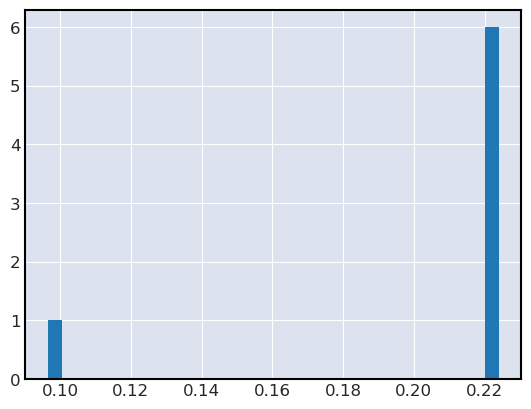

In [170]:
pnl_ratio_s[1:].hist(bins=32)

### MAR

In [172]:
(pnl_percent_s[-1] - 100) / -drawdown

6.806662557847455

### Profit Factor

In [201]:
pnl_s[pnl_s>0].sum() / -pnl_s[pnl_s<0].sum() if pnl_s[pnl_s<0].sum() !=0 else np.inf

inf

### ポジション保持区間

In [174]:
position_duration_s

2025-10-24 04:35:00+00:00   1 days 07:35:00
2025-10-26 03:50:00+00:00   1 days 13:30:00
2025-10-27 03:55:00+00:00   0 days 04:00:00
2025-10-31 05:15:00+00:00   0 days 16:00:00
2025-11-01 00:00:00+00:00   0 days 11:10:00
2025-11-04 03:15:00+00:00   2 days 12:45:00
2025-11-05 17:30:00+00:00   1 days 06:10:00
Name: position-duration, dtype: timedelta64[ns]

In [175]:
position_duration_s.describe()

count                            7
mean     1 days 03:18:34.285714285
std      0 days 19:03:46.535892258
min                0 days 04:00:00
25%                0 days 13:35:00
50%                1 days 06:10:00
75%                1 days 10:32:30
max                2 days 12:45:00
Name: position-duration, dtype: object

### ドローダウン

In [176]:
# 最大のドローダウン
df['drawdown_percent'].min()

-24.786313172212626

In [180]:
# 含み損になっている区間合計
interval = df.index.to_series().diff().median()
(df['drawdown_percent'] < 0).sum()*interval

Timedelta('2 days 08:35:00')

In [187]:
# N%以上の含み損になっている区間合計
thresholds = list(range(-1, -31, -1))

drawdown_duration = pd.DataFrame({
    "threshold": thresholds,
    "duration": [ (df['drawdown_percent'] < th).sum() * interval for th in thresholds ],
})

print(drawdown_duration)

    threshold        duration
0          -1 2 days 01:30:00
1          -2 1 days 16:05:00
2          -3 1 days 10:15:00
3          -4 1 days 05:40:00
4          -5 1 days 01:45:00
5          -6 0 days 22:15:00
6          -7 0 days 20:15:00
7          -8 0 days 18:25:00
8          -9 0 days 15:30:00
9         -10 0 days 14:00:00
10        -11 0 days 12:20:00
11        -12 0 days 11:05:00
12        -13 0 days 09:25:00
13        -14 0 days 06:50:00
14        -15 0 days 05:40:00
15        -16 0 days 05:00:00
16        -17 0 days 04:00:00
17        -18 0 days 03:05:00
18        -19 0 days 02:30:00
19        -20 0 days 01:25:00
20        -21 0 days 00:30:00
21        -22 0 days 00:20:00
22        -23 0 days 00:10:00
23        -24 0 days 00:05:00
24        -25 0 days 00:00:00
25        -26 0 days 00:00:00
26        -27 0 days 00:00:00
27        -28 0 days 00:00:00
28        -29 0 days 00:00:00
29        -30 0 days 00:00:00


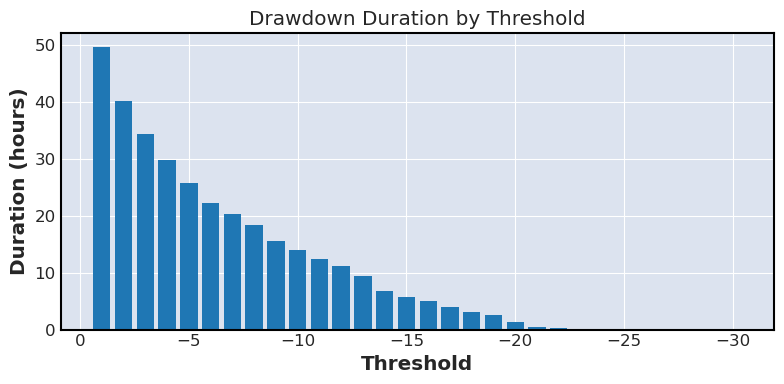

In [199]:
df_plot = drawdown_duration.copy()
df_plot["duration_hours"] = df_plot["duration"].dt.total_seconds() / 3600

plt.figure(figsize=(8,4))
plt.bar(df_plot["threshold"], df_plot["duration_hours"])
plt.gca().invert_xaxis()
plt.xlabel("Threshold")
plt.ylabel("Duration (hours)")
plt.title("Drawdown Duration by Threshold")
plt.tight_layout()
plt.show()

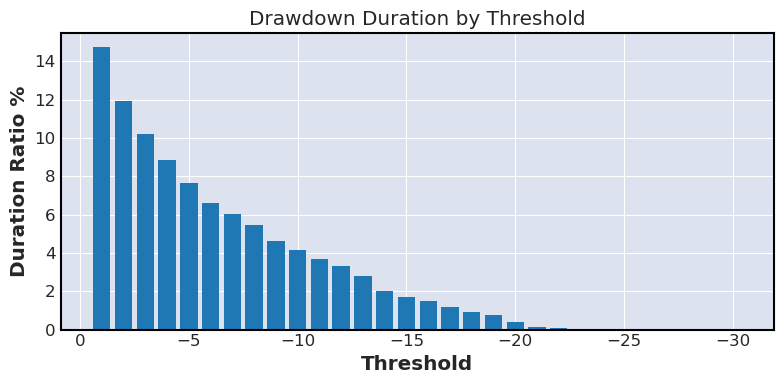

In [202]:
df_plot = drawdown_duration.copy()
df_plot["duration_ratio"] = df_plot["duration"].dt.total_seconds() / 3600 / 24 / DAYS * 100

plt.figure(figsize=(8,4))
plt.bar(df_plot["threshold"], df_plot["duration_ratio"])
plt.gca().invert_xaxis()
plt.xlabel("Threshold")
plt.ylabel("Duration Ratio %")
plt.title("Drawdown Duration by Threshold")
plt.tight_layout()
plt.show()

# mplfinance 用にデータを整形

In [188]:
df = df.astype({'volume':np.float32})

In [189]:
df['Open'] = df['open']
df['Close'] = df['close']
df['High'] = df['high']
df['Low'] = df['low']
df['Volume'] = df['volume']

In [190]:
# change entyry_point_s index to df.index
ep = entry_point_s.reindex(df.index)
cp = close_point_s.reindex(df.index)

# 全区間表示

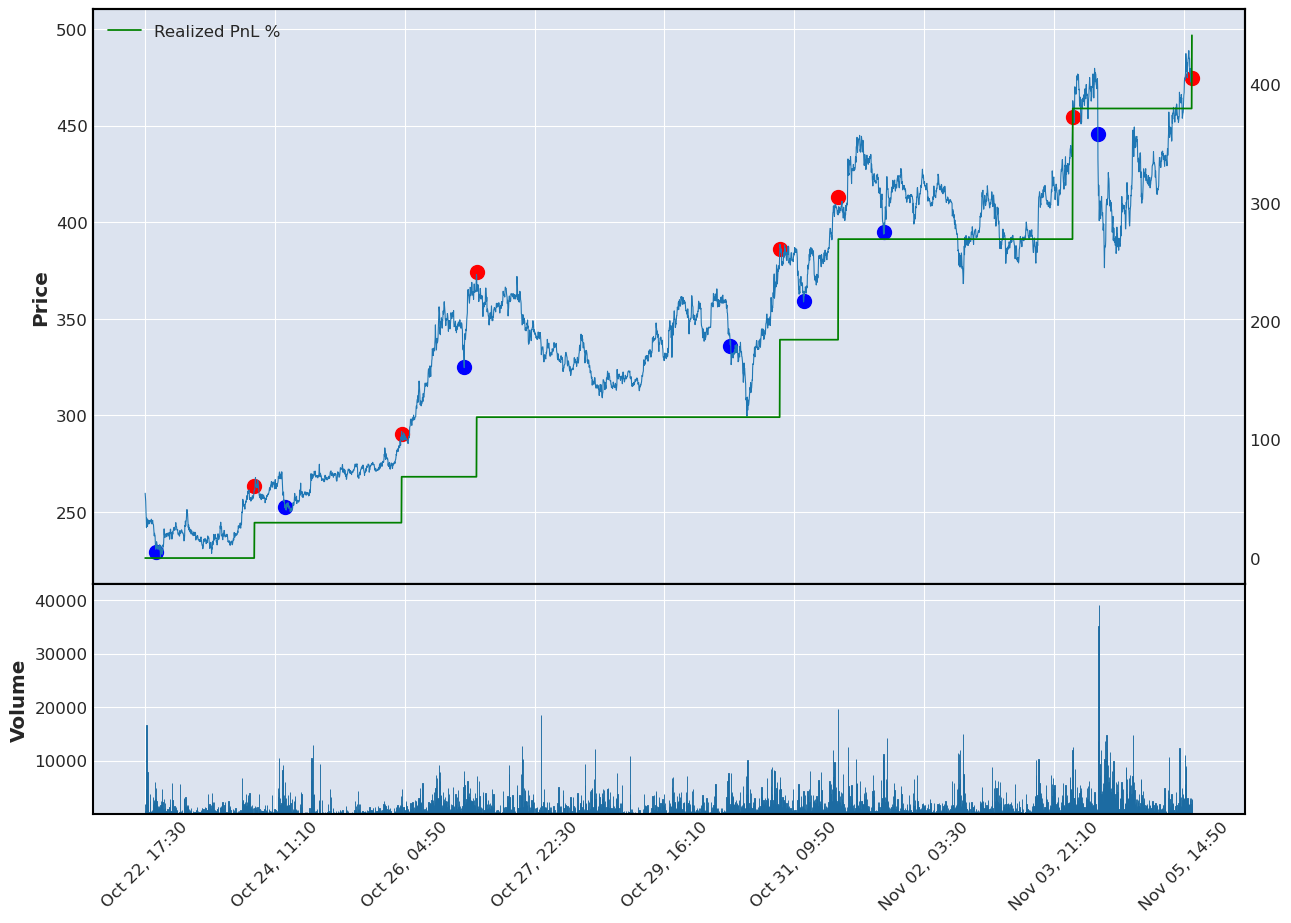

In [151]:
apdict = [
    mpf.make_addplot(df['pnl_percent'], color='green', label='Realized PnL %', secondary_y=True),
]

if ep.notna().sum() > 0:
    apdict.append(mpf.make_addplot(ep, type='scatter', markersize=100, marker='o', color='blue'))
if cp.notna().sum() > 0:
    apdict.append(mpf.make_addplot(cp, type='scatter', markersize=100, marker='o', color='red'))

# ax.plot(df['drawdown_percent'][start:end], color='red', label='Unrealized Pnl % (drawdown)')

mpf.plot(df, type='line', figscale=2, volume=True, addplot=apdict)

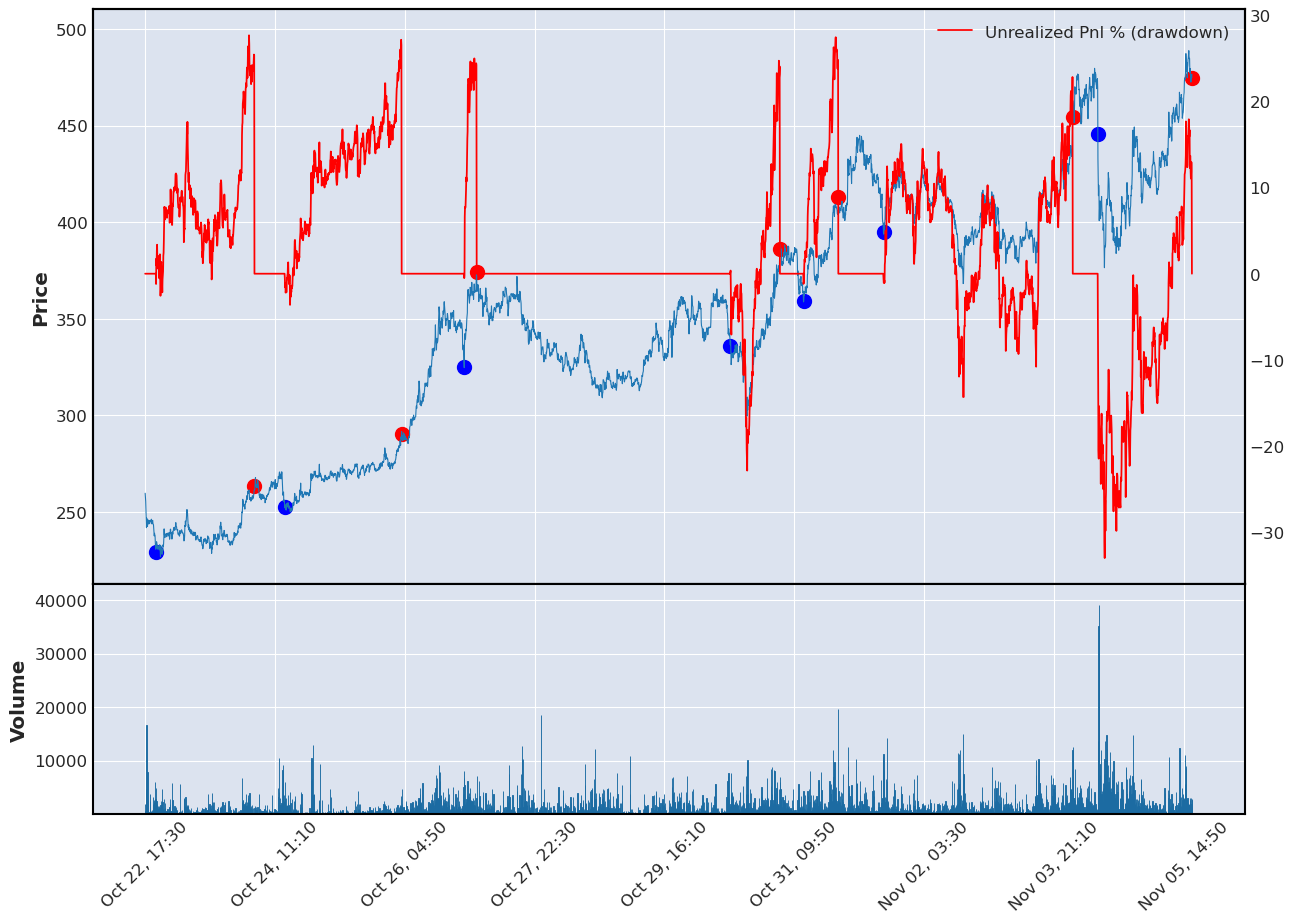

In [152]:
apdict = [
    mpf.make_addplot(df['drawdown_percent'], color='red', label='Unrealized Pnl % (drawdown)', secondary_y=True),
]

if ep.notna().sum() > 0:
    apdict.append(mpf.make_addplot(ep, type='scatter', markersize=100, marker='o', color='blue'))
if cp.notna().sum() > 0:
    apdict.append(mpf.make_addplot(cp, type='scatter', markersize=100, marker='o', color='red'))

# ax.plot(df['drawdown_percent'][start:end], color='red', label='Unrealized Pnl % (drawdown)')

mpf.plot(df, type='line', figscale=2, volume=True, addplot=apdict)

## 1日ごとに表示

2025-10-22 17:30:00+00:00


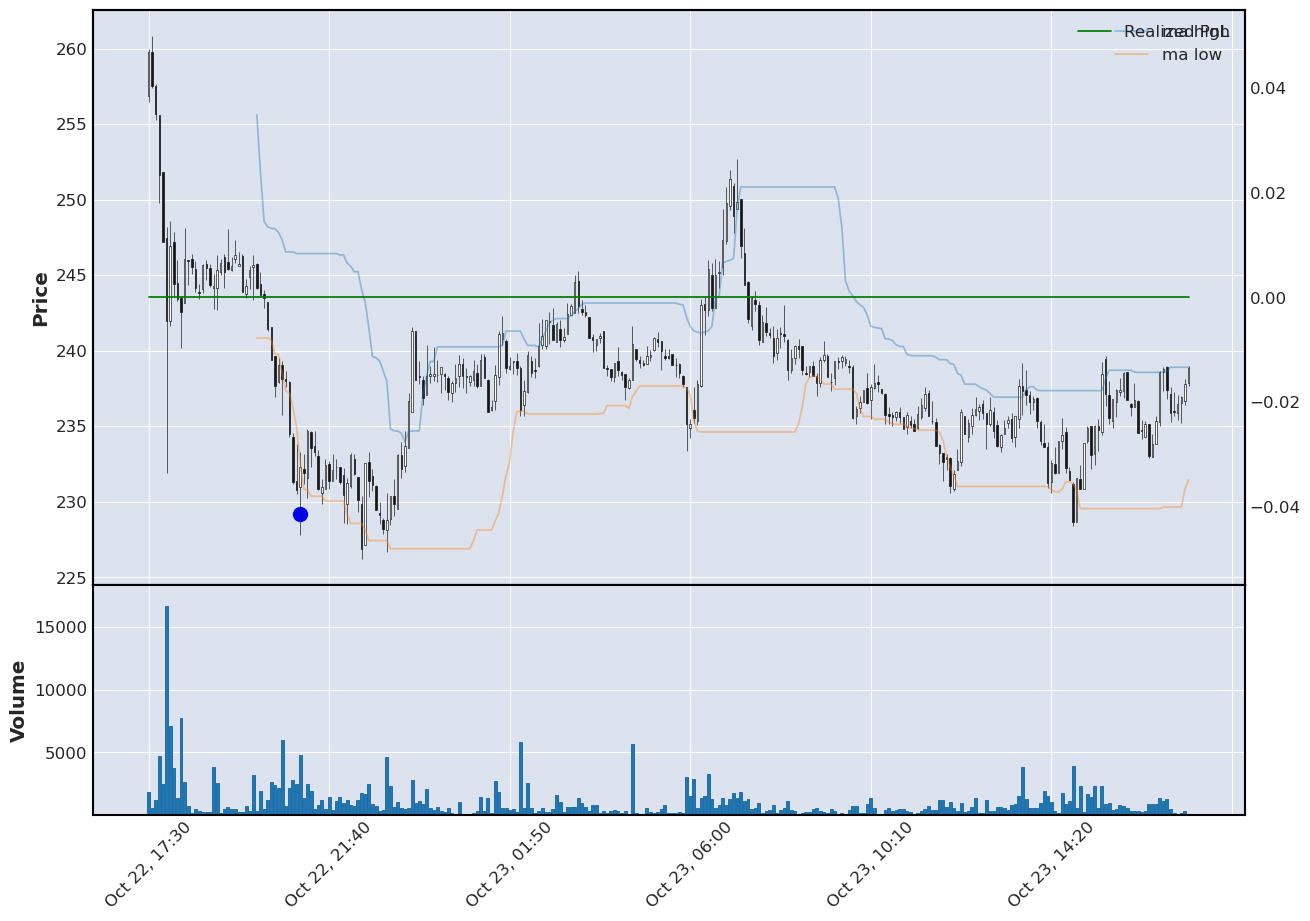

2025-10-23 17:30:00+00:00


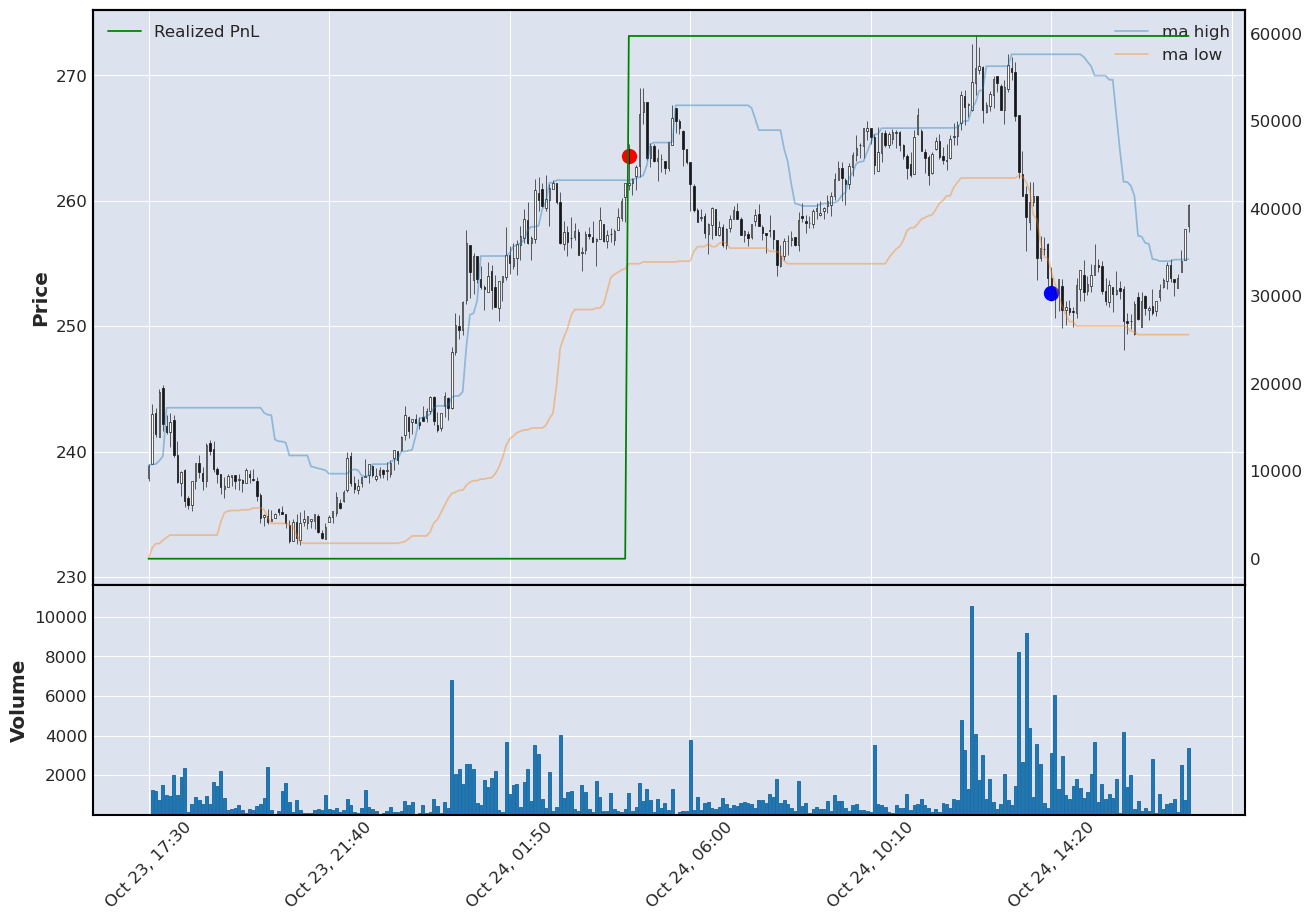

2025-10-24 17:30:00+00:00


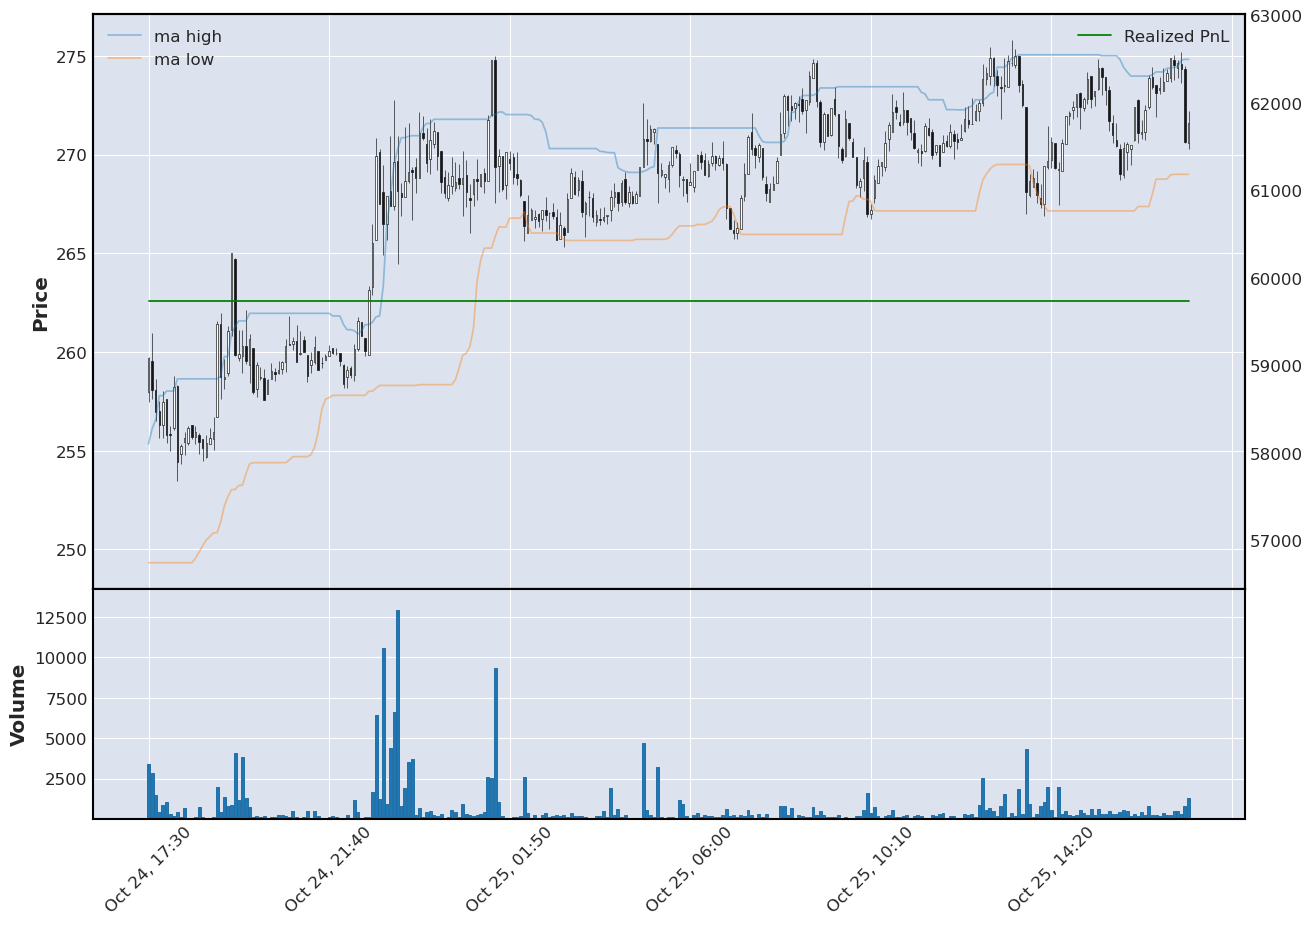

2025-10-25 17:30:00+00:00


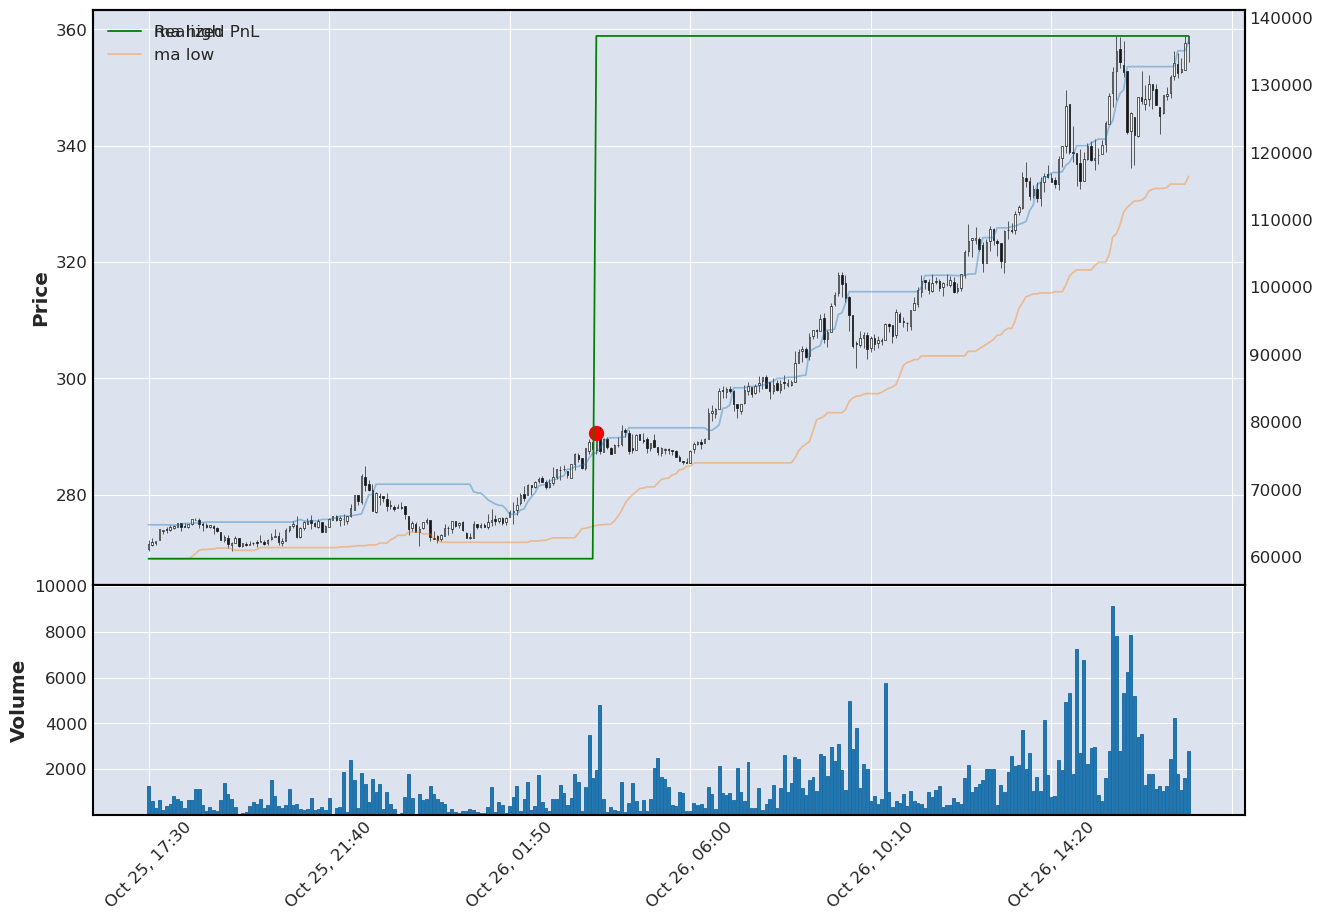

2025-10-26 17:30:00+00:00


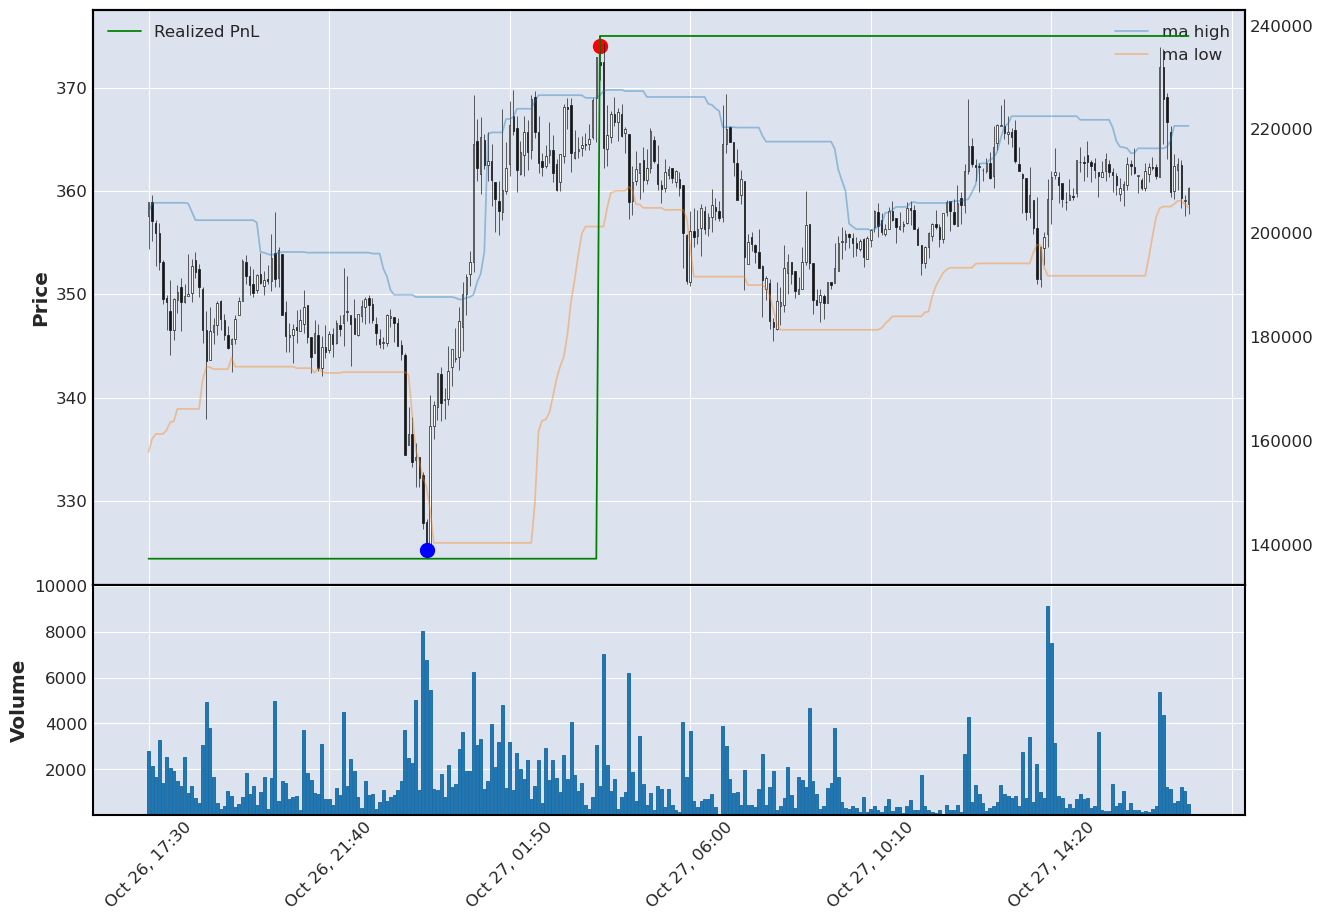

2025-10-27 17:30:00+00:00


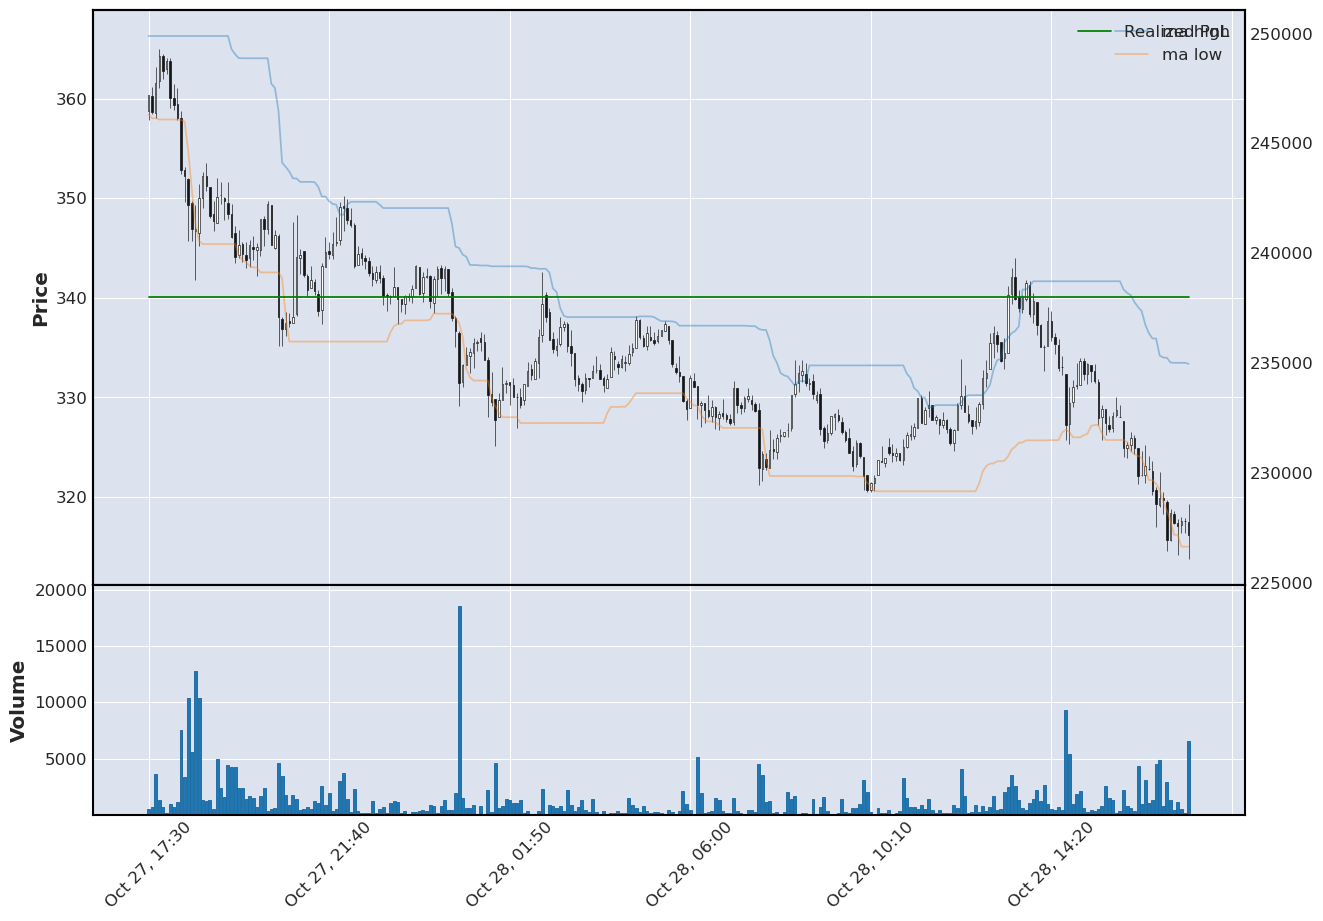

2025-10-28 17:30:00+00:00


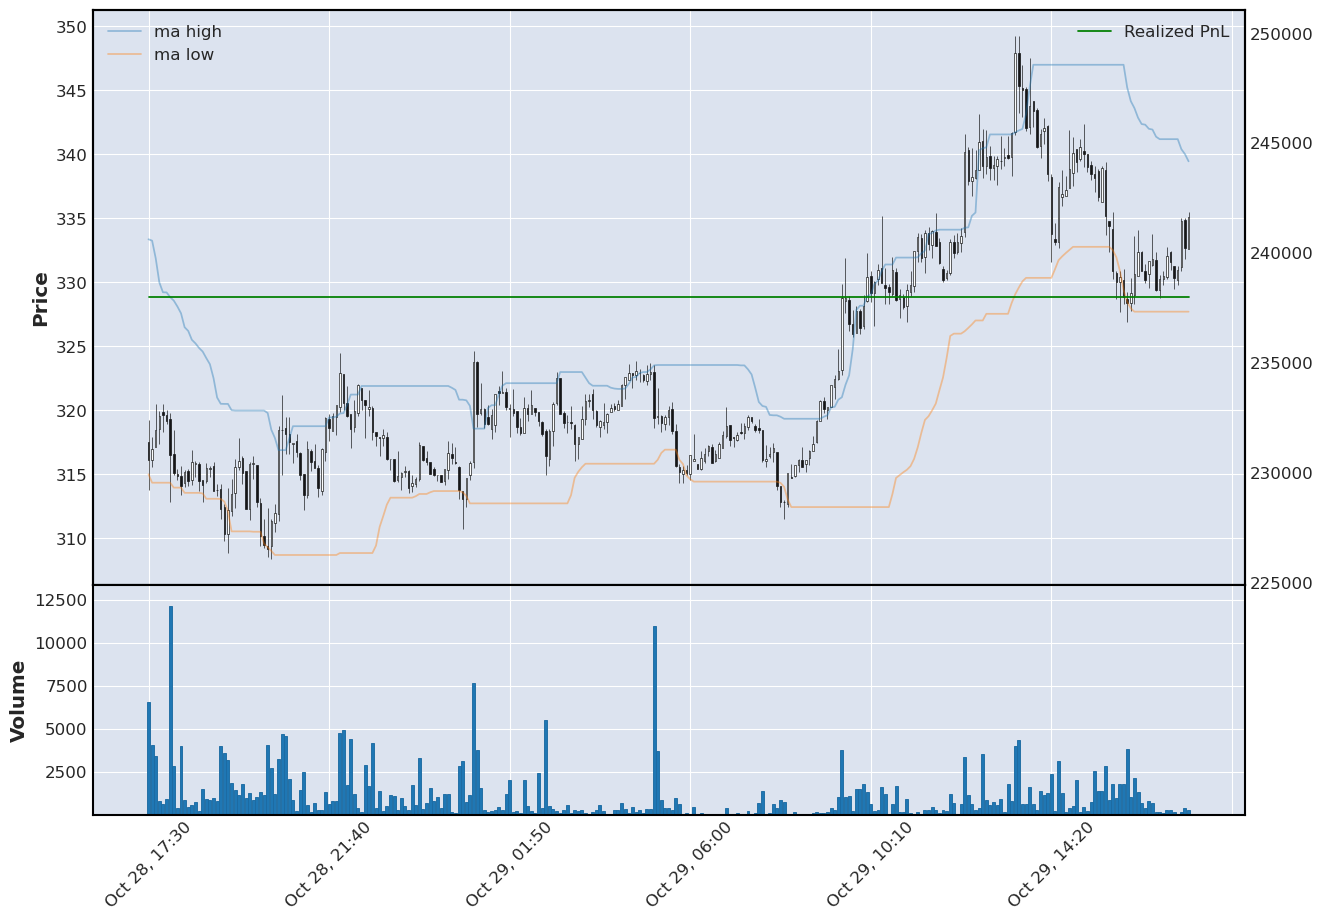

2025-10-29 17:30:00+00:00


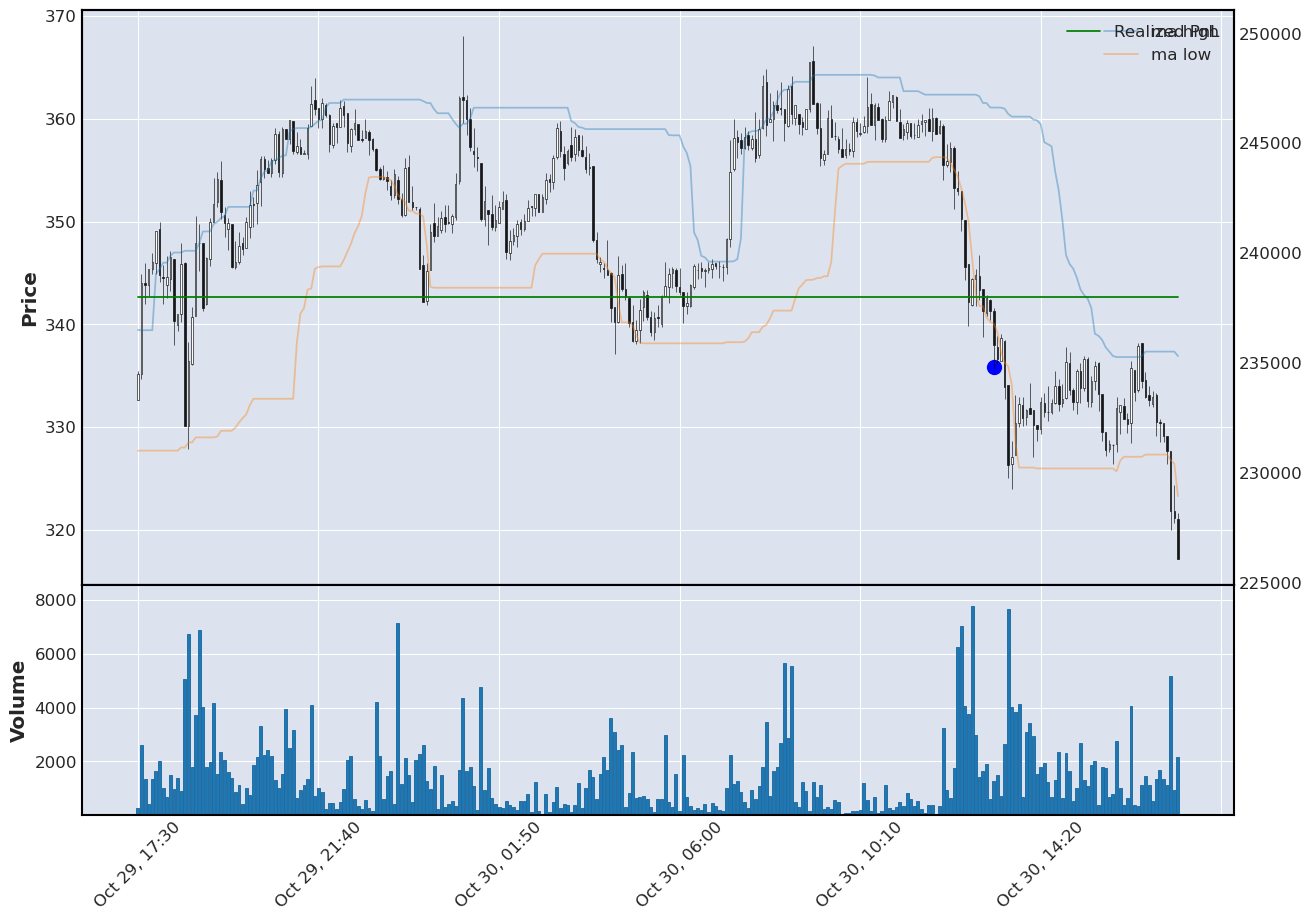

2025-10-30 17:30:00+00:00


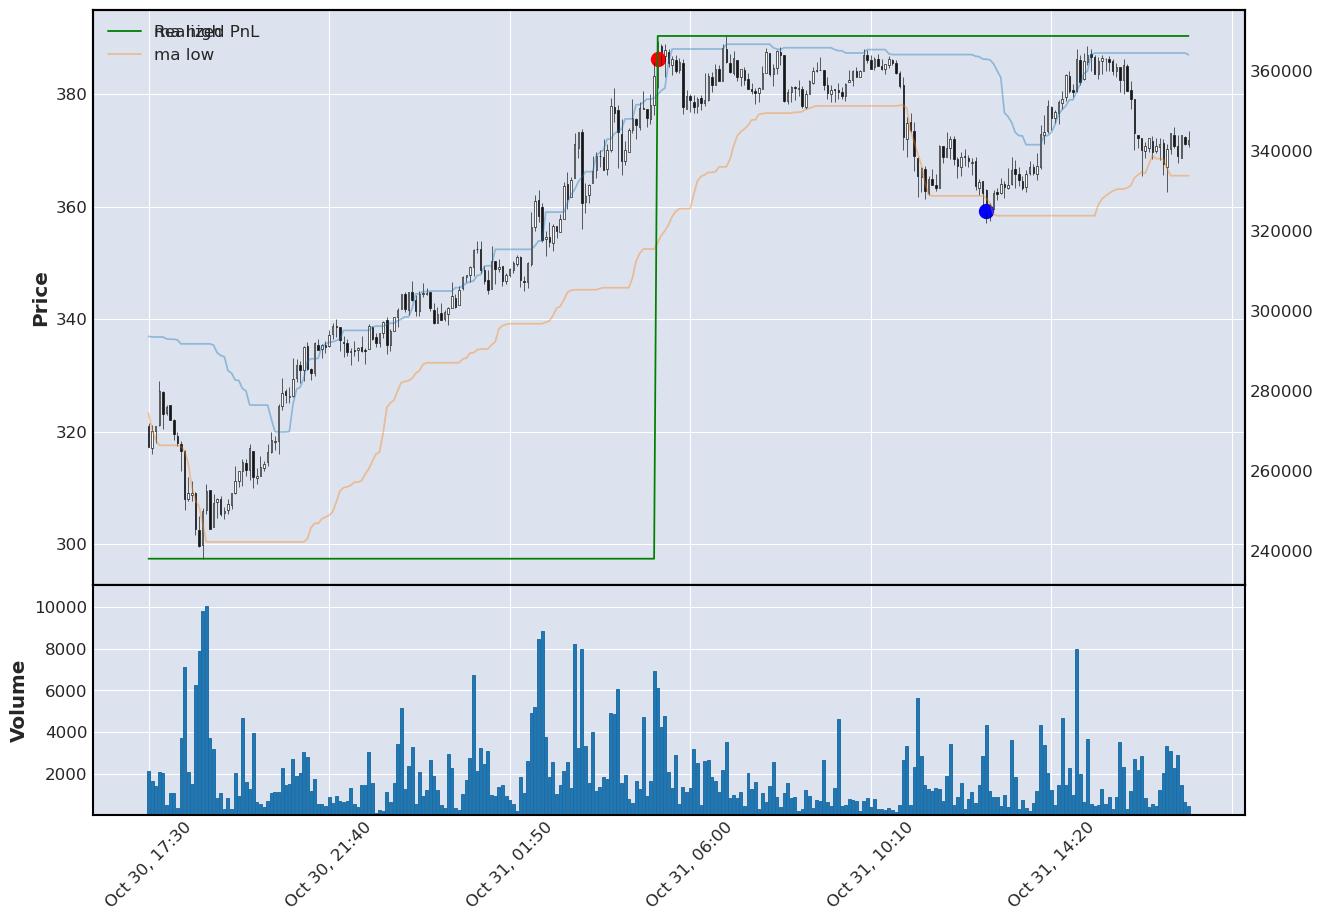

2025-10-31 17:30:00+00:00


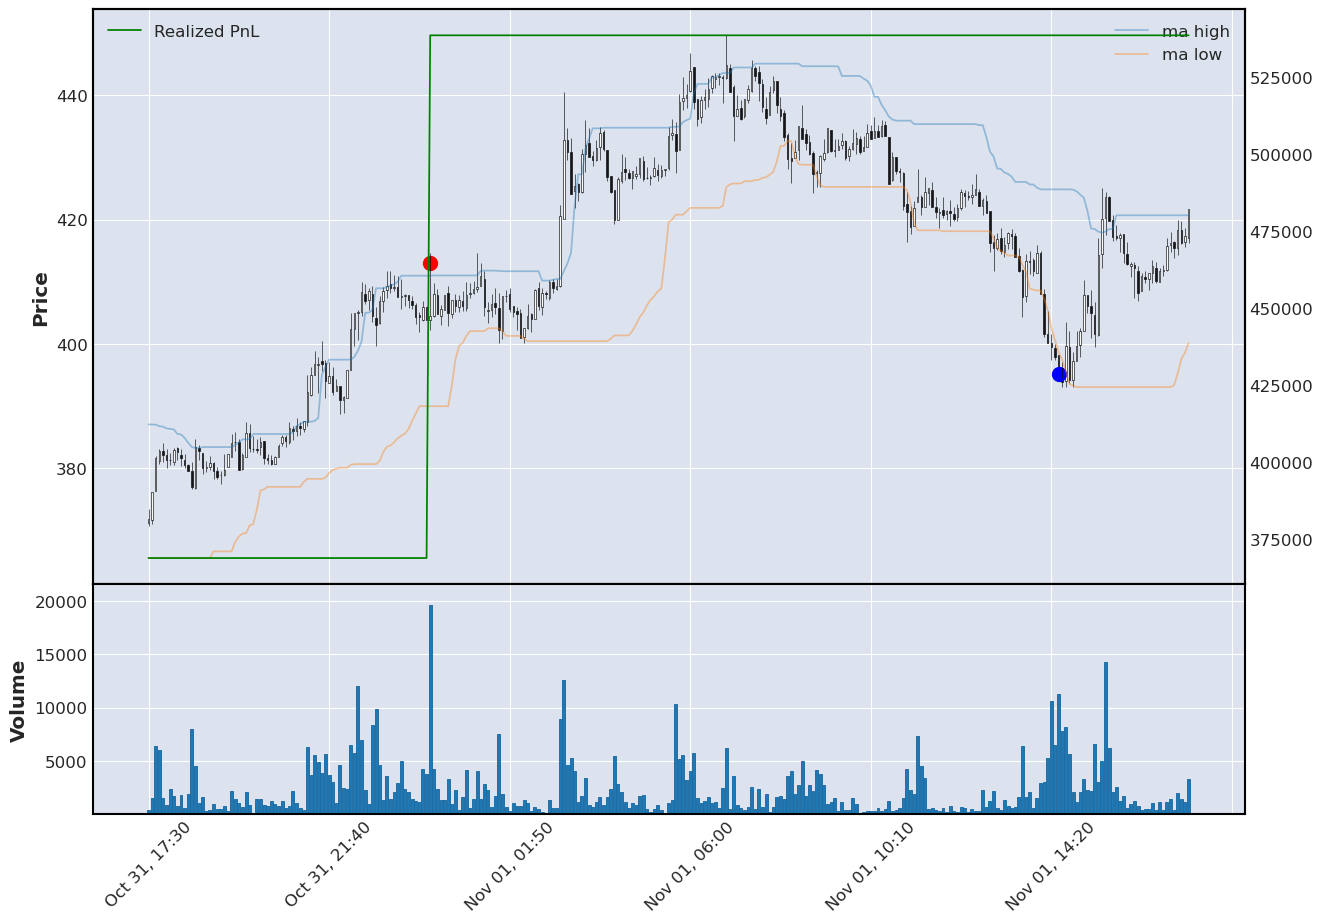

2025-11-01 17:30:00+00:00


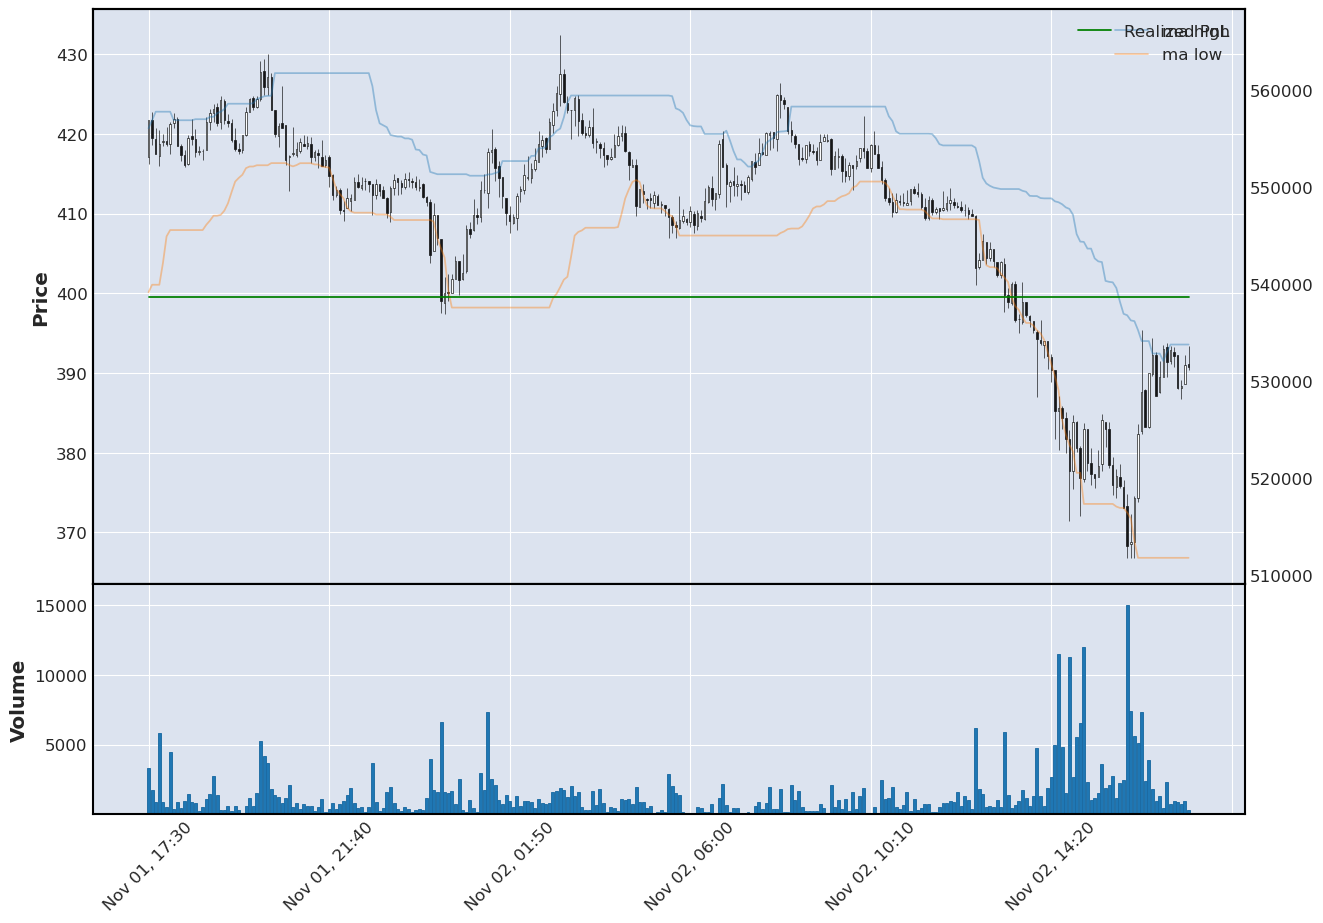

2025-11-02 17:30:00+00:00


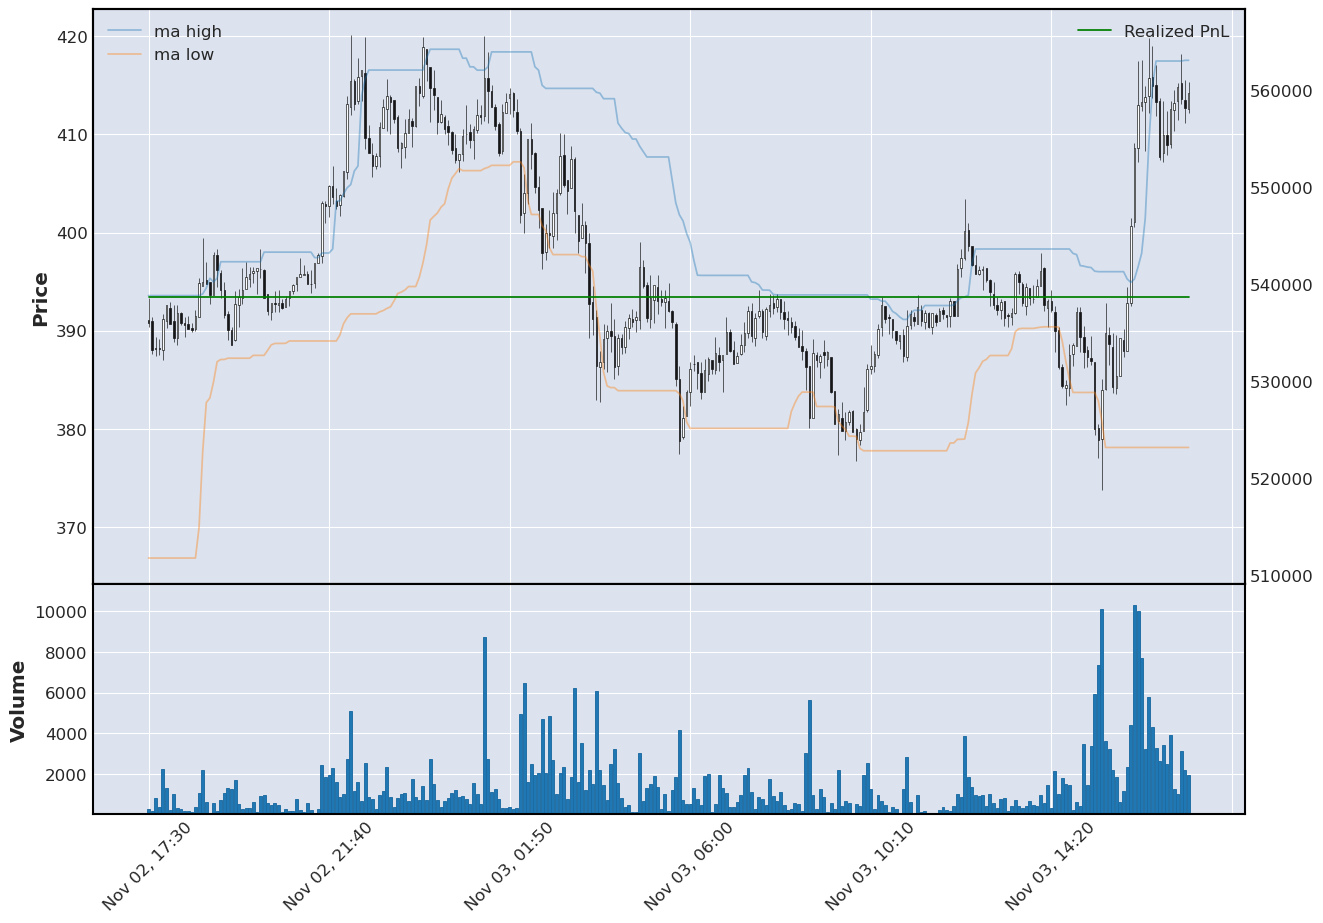

2025-11-03 17:30:00+00:00


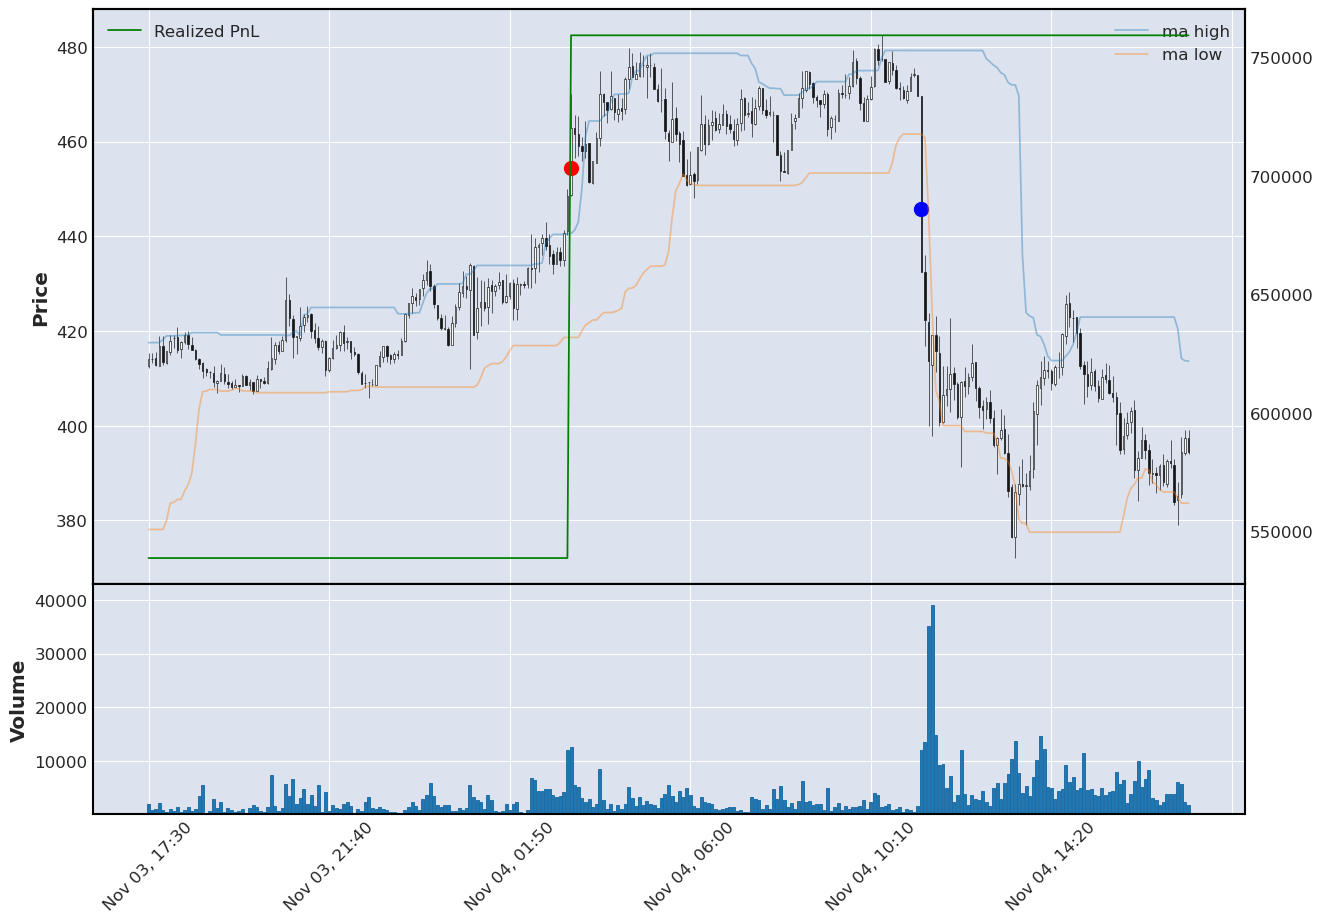

2025-11-04 17:30:00+00:00


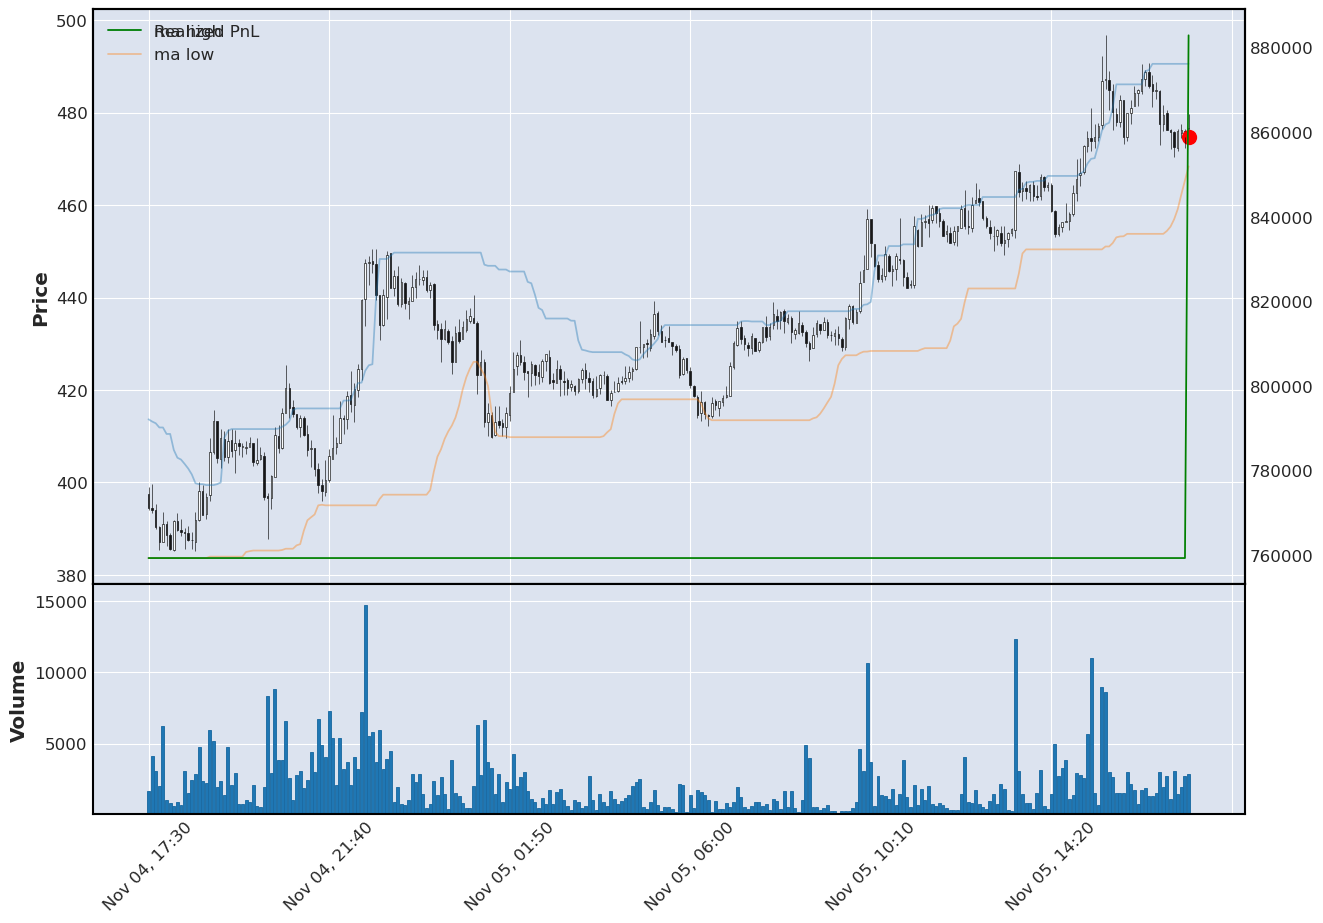

In [154]:

timestamp = df.index[0]
step = pd.Timedelta(1, "days")  # 1 hour step
while timestamp < df.index[-1]:
    print(timestamp)
    apdict = [
        mpf.make_addplot(df['rolled-high'][timestamp:timestamp + step], alpha=0.4, label='ma high'),
        mpf.make_addplot(df['rolled-low'][timestamp:timestamp + step], alpha=0.4, label='ma low'),
        mpf.make_addplot(df['pnl'].cumsum()[timestamp:timestamp + step], color='green', label='Realized PnL', secondary_y=True),
    ]

    if ep[timestamp:timestamp + step].notna().sum() > 0:
        apdict.append(mpf.make_addplot(ep[timestamp:timestamp + step], type='scatter', markersize=100, marker='o', color='blue'))
    if cp[timestamp:timestamp + step].notna().sum() > 0:
        apdict.append(mpf.make_addplot(cp[timestamp:timestamp + step], type='scatter', markersize=100, marker='o', color='red'))
        # mpf.make_addplot(cp[timestamp:timestamp + step], type='scatter', markersize=100, marker='o', color='red'),

    # ax.plot(df['drawdown_percent'][start:end], color='red', label='Unrealized Pnl % (drawdown)')
    # ax.plot(df['pnl_percent'][start:end], color='green', label='Realized PnL %')

    mpf.plot(df.loc[timestamp:timestamp + step], type='candle', figscale=2, volume=True, addplot=apdict)
    timestamp += step